# **TASK1: Prediction using Supervised ML**

## Author: Chobi Rani Sahu

## GRIP, The Sparks Foundation

## Data Science & Business Analytics

## Predict the percentage of an student based on the number of study hours.

In this task, our main objective is to predict the percentage of an student based on the number of study hour using a Supervised machine learning model. Here, we have labelled dataset hence supervised machine learning will be used. As it involves only two variables, we will be using simple linear regression. The steps followed to complete the task are:

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### 2. Importing Data

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 3. Exploring the Data

In [3]:
#Shape 
data.shape

(25, 2)

In [4]:
#Columns
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#Describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Number of unique values in 'scores' column
data.Scores.nunique()

23

In [7]:
#Checking Null Values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Hours'>

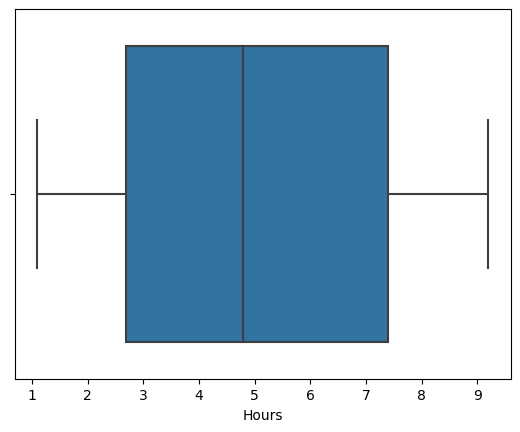

In [8]:
#Checking outliers by plotting boxplot
sns.boxplot(x=data.Hours)

<AxesSubplot:xlabel='Scores'>

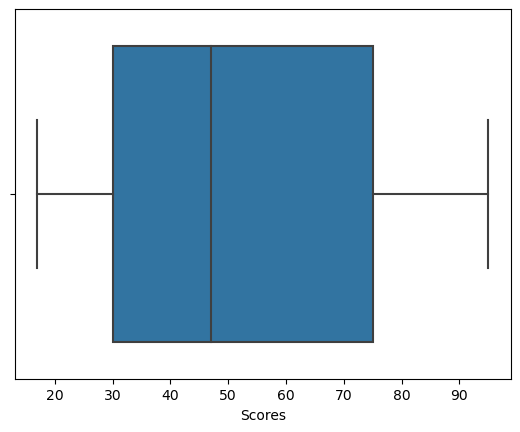

In [9]:
sns.boxplot(x=data.Scores)

From the graphs above, we can see that no major outliers exist.

### 4. Data Visualisation

Plotting the distribution of scores to see if there's any relationship between the data.

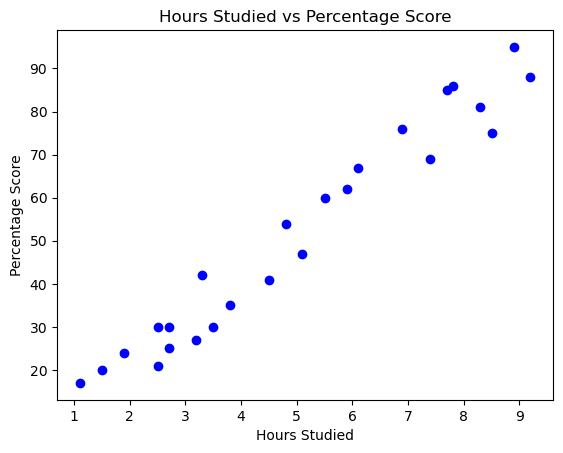

In [10]:
#Scatter Plot for 'Hours' and 'Scores'
plt.scatter(data['Hours'],data['Scores'],color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours Studied vs Percentage Score')
plt.show()

**From the graph above, its clear that there is a positive linear relation between the number of hours studied and percentage of score.**

<AxesSubplot:>

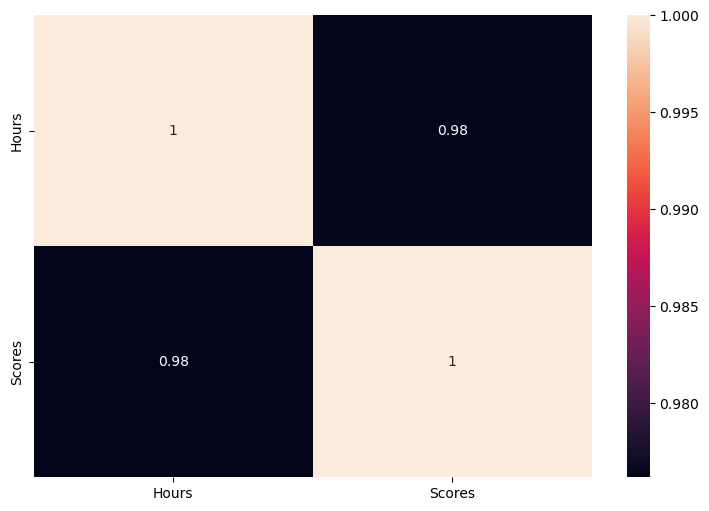

In [11]:
#Coorelation heatmap
correlation=data.corr()
plt.figure(figsize=(9,6))
sns.heatmap(correlation,annot=True)

From the above heatmap, we can clearly both the variables show a high positive correlation of 0.98 between each other. 

### 5. Preparing the data

Dividing the data into attributes(inputs) and labels(outputs).

In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### 6. Splitting the data for model building

Splitting the data into training and test sets by using Scikit-Learn's built-in train_test_split() method.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### 7. Training the model

In [14]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

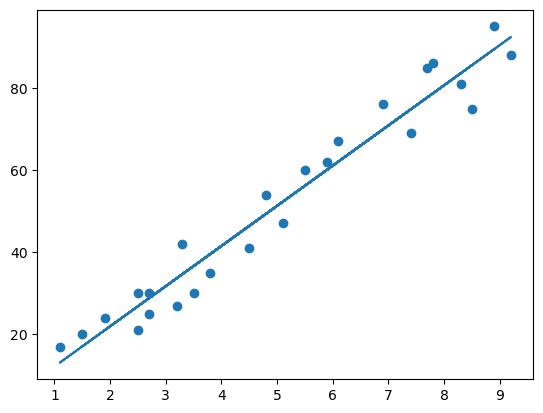

In [15]:
#Plotting the regression line and test data
line = reg.coef_*x + reg.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### 8. Making Predictions
Predicting the scores of the test values using our trained model.

In [16]:
# Testing data - In Hours
print(x_test) 
# Predicting the scores
y_pred = reg.predict(x_test)
# Comparing Actual vs Predicted scores
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359


In [17]:
test_score=reg.score(x_test,y_test)
train_score=reg.score(x_train,y_train)
print("Train Score:",train_score)
print("Test Score:",test_score)

Train Score: 0.9484997422695115
Test Score: 0.9568211104435257


In [18]:
# Predicting with your own data
hours = 9.25
np_hour=np.array(hours)
pred = reg.predict(np_hour.reshape(1,-1))
print("Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Hours Studied = 9.25
Predicted Score = 92.91505723477056


### 9. Evaluating the model
Evaluating the performance of the model by calculating mean absolute error

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred)) 
print("Root Mean Squared Error:",np.sqrt((metrics.mean_squared_error(y_test,y_pred))))

Mean Absolute Error: 4.4197278080276545
Mean Squared Error: 22.96509721270044
Root Mean Squared Error: 4.792191274636316


## Conclusion
In this task we successfully created and implemented a Linear Regression Model to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. According to this Linear Regression Model having an MAE of 4.42, MSE of 22.97 and RMSE of 4.79, the predicted percentage score of a student who studies 9.25 hours is **92.92**.
